In [74]:
import copy
import numpy
import random
import math
import matplotlib.pyplot as plt
from collections import deque

In [60]:
GROUP_ID = 'Group04'
ALGORITHM = 'bt'
PUZZLE_TYPE = 'easy'
PUZZLE_PATH = 'puzzles/Evil-P2.txt'

In [61]:
def printPuzzle(puzzle):
    for row in range(9):
        for column in range(8):
            print(puzzle[row][column].value + ",", end = "")
        print(puzzle[row][8].value)
    print("\n")

In [62]:
# Fill in the blank spots in the puzzle to create a random puzzle.
# Fill in 3x3 squares at a time such that all values in the square are different
def generateRandomPuzzle(originalPuzzle):
    newPuzzle = copy.deepcopy(originalPuzzle)
    for i in range(3):
        for j in range(3):
            nums = ['1','2','3','4','5','6','7','8','9']
            for row in range(0+(i*3), (i*3)+3):
                for column in range(0+(j*3), (j*3)+3):
                    tile = originalPuzzle[row][column]
                    if (tile.fixed == True):
                        
                        nums.remove(tile.value)
            for row in range(0+(i*3), (i*3)+3):
                for column in range(0+(j*3), (j*3)+3):
                    tile = newPuzzle[row][column]
                    if not(tile.fixed):
                        tile.value = random.choice(nums)
                        nums.remove(tile.value)
    return newPuzzle
    

In [75]:
class sudokuTile:
    def __init__(self, pos, val, layer):
        self.position = pos
        self.layer = layer
        self.value = val
        self.fixed = True
        self.col = pos(1)
        self.row = pos(0)
        if val == '?':
            self.fixed = False
            self.domain = ['1','2','3','4','5','6','7','8','9']
        else:
            self.domain = [val]

In [64]:
#adds up all the constraints violated in the puzzle and returns the value
def checkConstraintsViolated(p):
    violations = 0
    # checks if puzzle passes row rule
    for row in range(9):
        nums = []
        for column in range(9):
            nums.append(p[row][column].value)
        newNums = [item for item in nums if item != "?"]
        setNums = set(newNums)
        violations += len(newNums)- len(setNums)

    # checks if puzzle passes column rule
    for column in range(9):
        nums = []
        for row in range(9):
            nums.append(p[row][column].value)
        newNums = [item for item in nums if item != "?"]
        setNums = set(newNums)
        violations += len(newNums)- len(setNums)

    # checks if puzzle passes 3x3 grid rules
    for i in range(3):
        for j in range(3):
            nums = []
            for row in range(0 + (i * 3), (i * 3) + 3):
                for column in range(0 + (j * 3), (j * 3) + 3):
                    nums.append(p[row][column].value)
            newNums = [item for item in nums if item != "?"]
            setNums = set(newNums)
            violations += len(newNums)- len(setNums)
    return violations

In [65]:
def checkPuzzle(p):
    numConstraintsViolated = checkConstraintsViolated(p)
    if(numConstraintsViolated > 0):
        return False
    else:
        return True

In [66]:
#Simple backtracking algorithm using a stack
def backTracking(puzzle):
    #setting up the stack with the inital possible values for the first tile
    stack = [(puzzle[0][0], d) for d in puzzle[0][0].domain]
    layer = 0
    steps = 0
    while len(stack) > 0:
        # pop the top value off of the stack, and set the given tile's value to the given value
        prevLayer = layer
        steps += 1
        action = stack.pop()
        tile = action[0]
        val = action[1]
        tile.value = val
        # if the value is valid for the puzzle, add all the possible values for the next position on the board to the stack
        if (checkPuzzle(puzzle)):
            layer = tile.layer + 1
            # puzzle has been solved
            if (layer == 81):
                break
            row = layer // 9
            col = layer % 9
            nextTile = puzzle[row][col]
            for d1 in nextTile.domain:
                stack.append((nextTile, d1))
        # if the value is not valid, set the tile back to an unknown, and don't continue searching that path (prune said branch)
        else:
            if (not tile.fixed):
                layer = tile.layer
                tile.value = '?'

        # when backtracking, cleanup all unfixed tiles by turning them back into unknowns
        if (prevLayer > layer):
            for i in range(layer + 1, prevLayer):
                row = i // 9
                col = i % 9
                resetTile = puzzle[row][col]
                if not (resetTile.fixed):
                    resetTile.value = '?'

            # fix for edge case where puzzle couldn't backtrack to '1' in the starting square
            if (len(stack) == 0 and puzzle[0][0].value == '?'):
                puzzle[0][0].value = '1'
                nextTile = puzzle[0][1]
                for d1 in nextTile.domain:
                    stack.append((nextTile, d1))
    return puzzle, steps

In [67]:
#Backtracking algorithm with one-step forward checking
def forwardChecking(puzzle):
    #setting up the stack with the inital possible values for the first tile
    stack = [(puzzle[0][0], d) for d in puzzle[0][0].domain]
    layer = 0
    steps = 0
    while len(stack) > 0:
        # pop the top value off of the stack, and set the given tile's value to the given value
        prevLayer = layer
        steps += 1
        action = stack.pop()
        tile = action[0]
        val = action[1]
        tile.value = val
        # if the value is valid for the puzzle, add all the possible values for the next position on the board to the stack
        if (checkPuzzle(puzzle)):
            layer = tile.layer + 1
            # puzzle has been solved
            if (layer == 81):
                break
            row = layer // 9
            col = layer % 9
            nextTile = puzzle[row][col]
            #Changed for forwardTracking-- edits the domain of the next tile if value of current one interferes(same row)
            if(tile.position[0] == nextTile.position[0]):
                checkedDomain = [num for num in nextTile.domain if num != val]
            else:
                checkedDomain = nextTile.domain
            #If there are no numbers in the new domain, the value for the given tile is not possible
            if(len(checkedDomain) == 0):
                layer = tile.layer
                if (not tile.fixed):
                    tile.value = '?'
            for d1 in checkedDomain:
                stack.append((nextTile, d1))
        # if the value is not valid, set the tile back to an unknown, and don't continue searching that path (prune said branch)
        else:
            layer = tile.layer
            if (not tile.fixed):
                tile.value = '?'

        # when backtracking, cleanup all unfixed tiles by turning them back into unknowns
        if (prevLayer > layer):
            for i in range(layer + 1, prevLayer):
                row = i // 9
                col = i % 9
                resetTile = puzzle[row][col]
                if not (resetTile.fixed):
                    resetTile.value = '?'

            # fix for edge case where puzzle couldn't backtrack to '1' in the starting square
            if (len(stack) == 0 and puzzle[0][0].value == '?'):
                puzzle[0][0].value = '1'
                nextTile = puzzle[0][1]
                for d1 in nextTile.domain:
                    stack.append((nextTile, d1))
    return puzzle, steps

In [ ]:
class arc:
    def __init__(self,tile1,tile2):
        self.t1 = tile1
        self.t2 = tile2

def arcConsistency(puzzle):
    queue = addInitialArcs(puzzle)
    while not(queue.empty()):
        currentArc = queue.popleft()
        if removeInconsistentValues(currentArc):
            if not(currentArc.t1.domain):    # Check if first tiles domain is empty
                return False
            neighborArcs = addNeighborArcsExcept(currentArc,puzzle)
            queue.extend(neighborArcs)
    return True



def addInitialArcs(puzzle):
    queue = deque()
    # Add row arcs
    for row in range(9):
        for i in range(8):
            for j in range(i+1,9):
                newArc = arc(puzzle[row][i],puzzle[row][j])
                queue.append(newArc)
    # Add column arcs
    for col in range(9):
        for i in range(8):
            for j in range(i+1,9):
                newArc = arc(puzzle[i][col],puzzle[j][col])
                queue.append(newArc)
    # TODO: add subgrid arcs
    return queue

def addNeighborArcsExcept(arc,puzzle):
    tile1 = arc.t1
    tile2 = arc.t2
    queue = deque()
    # Add row arcs
    for i in range(9):
        if (i != tile1.col and puzzle[tile1.row][i] != tile2):
            queue.append(arc(puzzle[tile1.row][i],tile1))

    # Add col arcs
    for i in range(9):
        if (i != tile1.row and puzzle[i][tile1.col] != tile2):
            queue.append(arc(puzzle[i][tile1.col],tile1))

    # TODO: add subgrid arcs

    return queue


def removeInconsistentValues(arc):
    removed = False
    tile1 = arc.t1
    tile2 = arc.t2
    for value1 in tile1.domain:
        isDiff = False
        for value2 in tile2.domain:
            if(value2 != value1):
                isDiff = True
                break
        if not(isDiff):
            tile1.domain.remove(value1)
            removed = True
    return removed








In [68]:
# Makes a new puzzle from a given puzzle by swapping two values within one of the 3x3 grids
def getNeighborPuzzle(puzzle):
    neighbor = copy.deepcopy(puzzle)
    startrow = random.choice([0,3,6])
    startcol = random.choice([0,3,6])
    fixed = 0
    for r in range(startrow, startrow + 3):
        for c in range(startcol, startcol + 3):
            if (neighbor[r][c].fixed ==True):
                fixed = fixed + 1
    # Check if 3x3 square has all fixed points
    if fixed >= 8:
        return neighbor
    row1 = random.choice(range(startrow,startrow + 3))
    col1 = random.choice(range(startcol,startcol + 3))
    row2 = random.choice(range(startrow,startrow + 3))
    col2 = random.choice(range(startcol,startcol + 3))

    while(neighbor[row1][col1].fixed == True):
        row1 = random.choice(range(startrow,startrow + 3))
        col1 = random.choice(range(startcol,startcol + 3))
    while(neighbor[row2][col2].fixed == True):
        row2 = random.choice(range(startrow,startrow + 3))
        col2 = random.choice(range(startcol,startcol + 3))

    temp = neighbor[row1][col1]
    neighbor[row1][col1] = neighbor[row2][col2]
    neighbor[row2][col2] = temp
    return neighbor

def simulatedAnnealing(puzzle,maxSteps,inittemp):
    currentPuzzle = generateRandomPuzzle(puzzle)
    cutoff = 1e-4       # If temperature drops below this value, algorithm ends
    constraintsViolated = [checkConstraintsViolated(currentPuzzle)]
    iterations = [0]

    for iteration in range(maxSteps):
        temp = inittemp/((iteration+1)*.5)      # cooling schedule
        if (checkConstraintsViolated(currentPuzzle) == 0):
            break
        if (temp < cutoff):
            break
        nextPuzzle = getNeighborPuzzle(currentPuzzle)
        delta = checkConstraintsViolated(currentPuzzle) - checkConstraintsViolated(nextPuzzle)

        if (delta > 0):
            currentPuzzle = nextPuzzle
        elif (random.random() < math.exp(delta/temp)):
            currentPuzzle = nextPuzzle
        
        if(iteration % 10 == 0):
            constraintsViolated.append(checkConstraintsViolated(currentPuzzle))
            iterations.append(iteration)
    plt.plot(iterations,constraintsViolated)
    plt.xlabel("Iterations of Simulated Annealing")
    plt.ylabel("Total Constraint Violations")
    plt.title("Constraint Violations VS. Iteration Step")

    return currentPuzzle

# function that runs through a reasonable range of input values for simulated annealing to find what brings it close to a solution
# test multiple combinations of maximum steps and input temperature.
# plots a graph of the parameters tested.
# when ran, it shows that temperatures over 300 generally are worse for finding a solution.
# When ran, it shows that the algorithm generally stops altering the puzzle around iteration 7000
def findParameters(puzzle):
    for i in range(2000,10000,1000):
        for j in range(0,301,100):
            best = simulatedAnnealing(puzzle,i,j,.7)
            if(checkConstraintsViolated(best)<5):
                print("Possible choice:")
                print("Max steps: " + str(i))
                print("temp: " + str(j) + "\n")
    plt.show()
        
        

In [69]:
def geneticCrossover(firstPuzzle, secondPuzzle, crossoverRate):
    newPuzzle = copy.deepcopy(firstPuzzle)
    for row in range(9):
        for column in range(9):
            randomNum = random.uniform(0, 1)
            if (randomNum <= crossoverRate):
                newPuzzle[row][column].value = secondPuzzle[row][column].value
    return newPuzzle

def geneticMutation(mutationRate, puzzle):
    #want to mutate by picking a random row and swapping two (unfixed) values
    newPuzzle = copy.deepcopy(puzzle)
    randomNum = random.uniform(0, 1)
    if (randomNum <= mutationRate):
        randomRow = random.randrange(0,9)
        foundSwaps = False
        while(not foundSwaps):
            randomCol1 = random.randrange(0,9)
            tile1 = newPuzzle[randomRow][randomCol1]
            randomCol2 = random.randrange(0,9)
            tile2 = newPuzzle[randomRow][randomCol2]
            if not (tile1.fixed or tile2.fixed):
                tempVal = tile1.value
                tile1.value = tile2.value
                tile2.value = tempVal
                foundSwaps = True

    return newPuzzle


def geneticAlgorithm(originalPuzzle, popSize, crossoverRate, mutationRate):
    population = {}
    #initializing the population
    for i in range(popSize):
        #create new puzzle
        randomPuzzle = generateRandomPuzzle(originalPuzzle)
        randomPuzzle = tuple(map(tuple, randomPuzzle))
        #calculate the fitness of the puzzle
        fitness = 1/(checkConstraintsViolated(randomPuzzle))
        population[randomPuzzle] = fitness
    #applying crossover and mutation to individuals to create children
    #number of epochs
    for i in range(100):
        newPopulation = {}
        for puzzle in population:
            selectionPopulation = copy.deepcopy(population)
            #TOURNAMENT:: MAY THE 2 BEST WIN
            tourneySize = 10
            tournament = {}
            for t in range(tourneySize):
                randomChamp = random.choice(list(selectionPopulation.keys()))
                tournament[randomChamp] = selectionPopulation[randomChamp]
                selectionPopulation.pop(randomChamp)
            firstParent = max(tournament.keys(), key=tournament.get)
            tournament.pop(firstParent)
            secondParent = max(tournament.keys(), key=tournament.get)
            newPuzzle = geneticCrossover(firstParent, secondParent, crossoverRate)
            newPuzzle = geneticMutation(mutationRate, newPuzzle)
            #need to calculate loss of new puzzle again and add it to the new population
            fitness = 1/(checkConstraintsViolated(newPuzzle))
            newPuzzle = tuple(map(tuple, newPuzzle))
            newPopulation[newPuzzle] = fitness
        population = newPopulation
        print("Iteration ", i, "least constraints violated:" , 1/max(population.values()))
    finalPuzzle = max(population.keys(), key=population.get)
    return finalPuzzle



In [70]:
#Processes the sudoku file into a numpy array of sudokuTile objects
arr = []
layer = 0
with open(PUZZLE_PATH, 'r') as file:
    firstLine = True
    rowNum = 0
    for line in file:
        colNum = 0
        processedLine = line.rstrip('\n')
        if(firstLine):
            row = processedLine[1:].split(",")
            firstLine = False
        else:
            row = processedLine.split(",")
        tileRow = []
        for num in row:
            tile = sudokuTile([rowNum, colNum], num, layer)
            layer += 1
            tileRow.append(tile)
            colNum += 1
        arr.append(tileRow)
        rowNum += 1
    file.close()
puzzle = numpy.array(arr)
originalPuzzle = copy.deepcopy(puzzle)
if(ALGORITHM == 'bt'):
    solvedPuzzle, steps = backTracking(puzzle)
elif(ALGORITHM == 'fc'):
    solvedPuzzle, steps = forwardChecking(puzzle)
print(ALGORITHM)
print(PUZZLE_PATH)
print("=====================")
print("Original Puzzle: ")
printPuzzle(originalPuzzle)
print("Solved Puzzle in", steps, "steps:")
printPuzzle(solvedPuzzle)


#Writing the finished puzzle to a file
fileName = GROUP_ID + '_' + ALGORITHM + "_" + PUZZLE_TYPE + "_" + PUZZLE_PATH.lstrip("puzzles/")
with open(fileName, 'w') as file:
    for row in range(9):
        for column in range(8):
            file.write(puzzle[row][column].value + ",")
        file.write(puzzle[row][8].value + '\n')
    file.close()

bt
puzzles/Evil-P2.txt
Original Puzzle: 
?,?,?,?,1,?,?,4,7
?,?,?,?,?,4,6,2,?
?,?,?,8,?,?,?,?,?
7,?,5,?,?,?,4,?,?
?,?,3,5,7,6,8,?,?
?,?,9,?,?,?,3,?,5
?,?,?,?,?,3,?,?,?
?,8,1,2,?,?,?,?,?
5,7,?,?,9,?,?,?,?


Solved Puzzle in 126393 steps:
1,?,?,?,1,?,?,4,7
?,?,?,?,?,4,6,2,?
?,?,?,8,?,?,?,?,?
7,?,5,?,?,?,4,?,?
?,?,3,5,7,6,8,?,?
?,?,9,?,?,?,3,?,5
?,?,?,?,?,3,?,?,?
?,8,1,2,?,?,?,?,?
5,7,?,?,9,?,?,?,?




In [71]:
#originalPuzzle = arr
#bestPuzzle = geneticAlgorithm(originalPuzzle, 150, 0.5, .1)
#printPuzzle(bestPuzzle)
#print(checkConstraintsViolated(bestPuzzle))



6,5,8,3,1,2,9,4,7
1,3,7,9,5,4,6,2,8
9,2,4,8,6,7,1,5,3
7,1,5,8,3,9,4,6,2
2,4,3,5,7,6,8,9,1
8,6,9,4,2,1,3,7,5
4,9,2,7,8,3,5,1,6
3,8,1,2,4,5,7,3,9
5,7,6,1,9,6,2,8,4


Final number of constraints viloated: 4


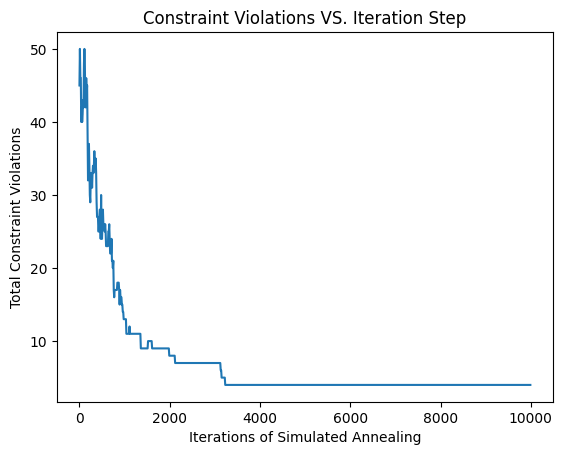

In [72]:
best = simulatedAnnealing(originalPuzzle,10000,200)
printPuzzle(best)
print("Final number of constraints viloated: " + str(checkConstraintsViolated(best)))
plt.show()
